In [210]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [211]:
data=pd.read_csv("C:/Users/Dareen/OneDrive/Desktop/house price predection/data/AmesHousing.csv")

In [212]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [214]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03


In [215]:
data = data.drop(['Alley'],axis=1)
data = data.drop(['Mas Vnr Type'],axis=1)
data = data.drop(['Fence'],axis=1)
data = data.drop(['Pool QC'],axis=1)
data = data.drop(['Fireplace Qu'],axis=1)
data = data.drop(['Misc Feature'],axis=1)


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [217]:
data['Mas Vnr Area'].fillna(data['Mas Vnr Area'].median(),inplace=True)
data['Garage Cond'].fillna(0)
data['Garage Qual'].fillna(0)
data['Garage Finish'].fillna(0)
data['Garage Type'].fillna(0)
data['BsmtFin Type 2'].fillna(0)

0       Unf
1       LwQ
2       Unf
3       Unf
4       Unf
       ... 
2925    Unf
2926    ALQ
2927    Unf
2928    LwQ
2929    Unf
Name: BsmtFin Type 2, Length: 2930, dtype: object

In [218]:
data['Lot Frontage'].fillna(data['Lot Frontage'].median(), inplace=True)
data['Garage Yr Blt'].fillna(data['Garage Yr Blt'].median(), inplace=True)

In [219]:
data.dropna()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,2925,923251180,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,9,2006,WD,Abnorml,131000
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,68.0,8885,Pave,IR1,Low,AllPub,...,0,0,0,0,0,6,2006,WD,Normal,131000
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [220]:
data['MS Zoning'].unique()

array(['RL', 'RH', 'FV', 'RM', 'C (all)', 'I (all)', 'A (agr)'],
      dtype=object)

In [221]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['MS Zoning']=le.fit_transform(data['MS Zoning'])

In [222]:
data['Order'].unique()

array([   1,    2,    3, ..., 2928, 2929, 2930], dtype=int64)

In [223]:
len(data['PID'].unique())

2930

In [224]:
data=data.drop(['PID'],axis=1)
data=data.drop(['Order'],axis=1)

In [225]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [226]:
data['Street']=le.fit_transform(data['Street'])

In [227]:
data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,5,141.0,31770,1,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,4,80.0,11622,1,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,5,81.0,14267,1,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,5,93.0,11160,1,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,5,74.0,13830,1,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [228]:
object_columns = data.select_dtypes(include=['object']).columns.tolist()

In [229]:
object_columns

['Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [230]:
for column in object_columns:
    data[column] = le.fit_transform(data[column].astype(str))

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2930 non-null   int64  
 1   MS Zoning        2930 non-null   int32  
 2   Lot Frontage     2930 non-null   float64
 3   Lot Area         2930 non-null   int64  
 4   Street           2930 non-null   int32  
 5   Lot Shape        2930 non-null   int32  
 6   Land Contour     2930 non-null   int32  
 7   Utilities        2930 non-null   int32  
 8   Lot Config       2930 non-null   int32  
 9   Land Slope       2930 non-null   int32  
 10  Neighborhood     2930 non-null   int32  
 11  Condition 1      2930 non-null   int32  
 12  Condition 2      2930 non-null   int32  
 13  Bldg Type        2930 non-null   int32  
 14  House Style      2930 non-null   int32  
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

In [232]:
data.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,5,141.0,31770,1,0,3,0,0,0,...,0,0,0,0,0,5,2010,9,4,215000
1,20,4,80.0,11622,1,3,3,0,4,0,...,0,0,120,0,0,6,2010,9,4,105000
2,20,5,81.0,14267,1,0,3,0,0,0,...,0,0,0,0,12500,6,2010,9,4,172000
3,20,5,93.0,11160,1,3,3,0,0,0,...,0,0,0,0,0,4,2010,9,4,244000
4,60,5,74.0,13830,1,0,3,0,4,0,...,0,0,0,0,0,3,2010,9,4,189900


In [233]:
data=data.dropna()

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2927 non-null   int64  
 1   MS Zoning        2927 non-null   int32  
 2   Lot Frontage     2927 non-null   float64
 3   Lot Area         2927 non-null   int64  
 4   Street           2927 non-null   int32  
 5   Lot Shape        2927 non-null   int32  
 6   Land Contour     2927 non-null   int32  
 7   Utilities        2927 non-null   int32  
 8   Lot Config       2927 non-null   int32  
 9   Land Slope       2927 non-null   int32  
 10  Neighborhood     2927 non-null   int32  
 11  Condition 1      2927 non-null   int32  
 12  Condition 2      2927 non-null   int32  
 13  Bldg Type        2927 non-null   int32  
 14  House Style      2927 non-null   int32  
 15  Overall Qual     2927 non-null   int64  
 16  Overall Cond     2927 non-null   int64  
 17  Year Built       29

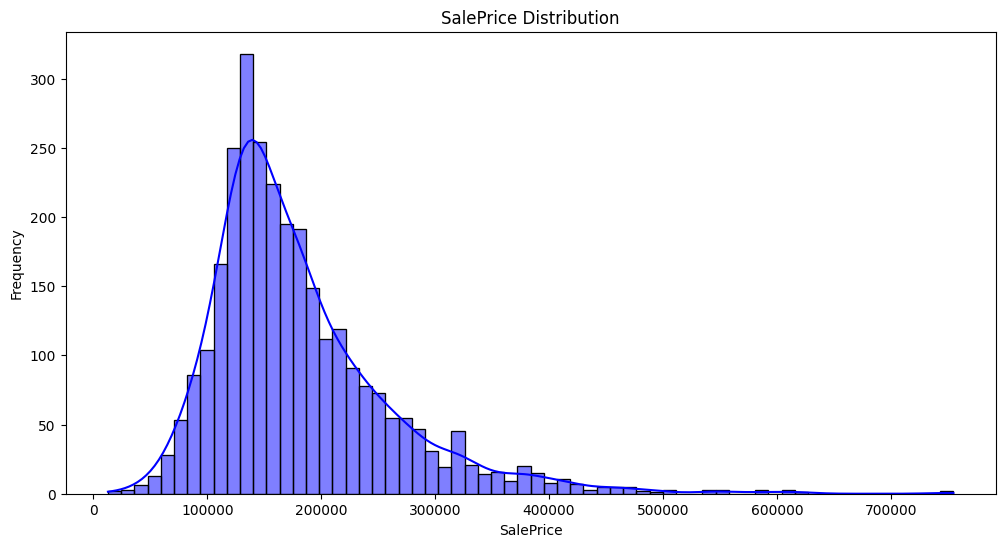

In [235]:
plt.figure(figsize=(12, 6))
sns.histplot(data['SalePrice'], kde=True, color='blue')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [236]:
skewness = data['SalePrice'].skew()
print(f"Skewness of SalePrice: {skewness}")

Skewness of SalePrice: 1.7453127765926155


In [237]:
data['SalePrice']=np.log1p(data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

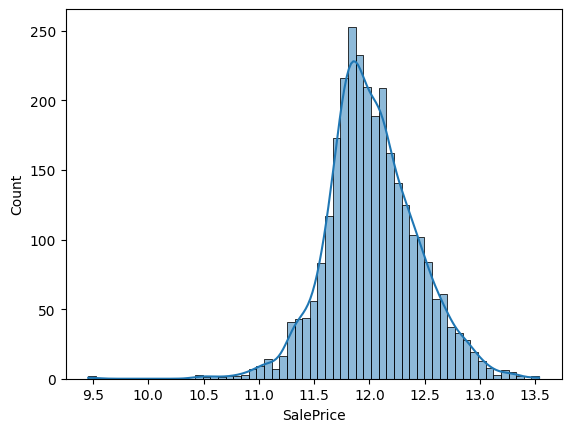

In [238]:
sns.histplot(x=data['SalePrice'],kde=True)

In [239]:
skewness = data['SalePrice'].skew()
print(f"Skewness of SalePrice: {skewness}")

Skewness of SalePrice: -0.014267825165087603


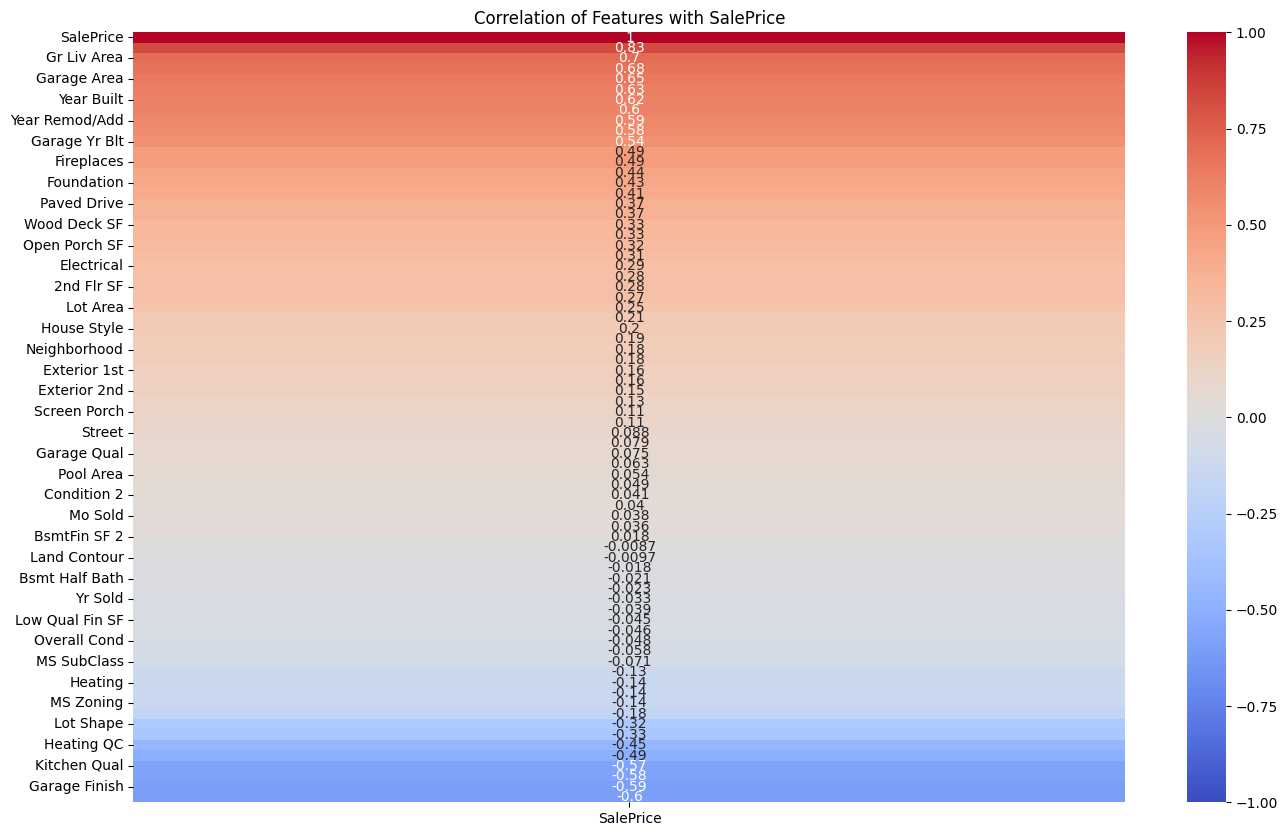

In [241]:
correlation_matrix = data.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with SalePrice')
plt.show()

Text(0.5, 1.0, 'Year Built vs. SalePrice')

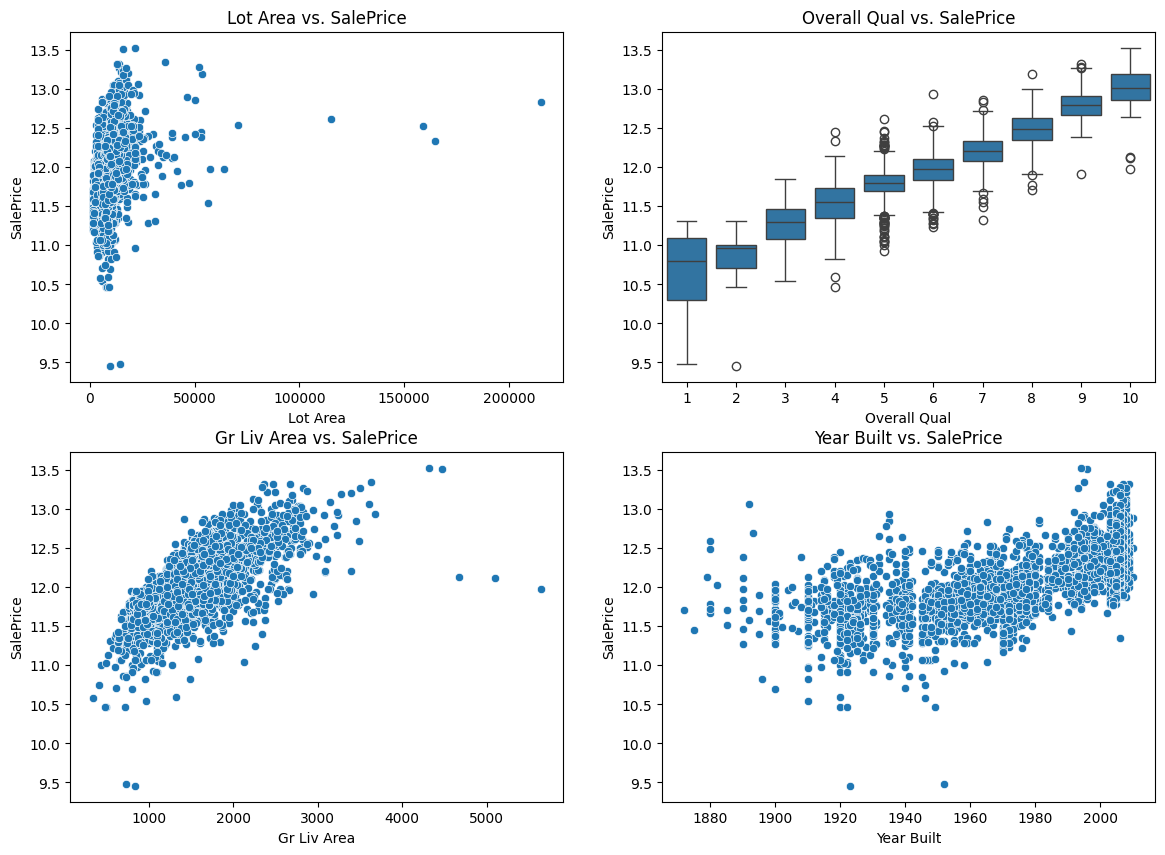

In [244]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(x=data['Lot Area'], y=data['SalePrice'], ax=axes[0, 0])
axes[0, 0].set_title('Lot Area vs. SalePrice')

sns.boxplot(x=data['Overall Qual'], y=data['SalePrice'], ax=axes[0, 1])
axes[0, 1].set_title('Overall Qual vs. SalePrice')

sns.scatterplot(x=data['Gr Liv Area'], y=data['SalePrice'], ax=axes[1, 0])
axes[1, 0].set_title('Gr Liv Area vs. SalePrice')

sns.scatterplot(x=data['Year Built'], y=data['SalePrice'], ax=axes[1, 1])
axes[1, 1].set_title('Year Built vs. SalePrice')


In [245]:
x=data.drop(['SalePrice'],axis=1)
y=data['SalePrice']


In [246]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x_scaled =ss.fit_transform(x)

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [251]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [252]:
y_pred=lr.predict(X_test)

In [256]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Absolute Error: 0.08901946800703188
Mean Squared Error: 0.0243033619588327
Root Mean Squared Error: 0.15589535579622857
R-squared: 0.8558927318467847


In [260]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [261]:
r2 = r2_score(y_test, y_pred)
r2

0.858695869021872

In [262]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

In [263]:
r2 = r2_score(y_test, y_pred)
r2

0.8559023439014369